<a href="https://colab.research.google.com/github/rich7420/CNN-Assignment-2025/blob/main/CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

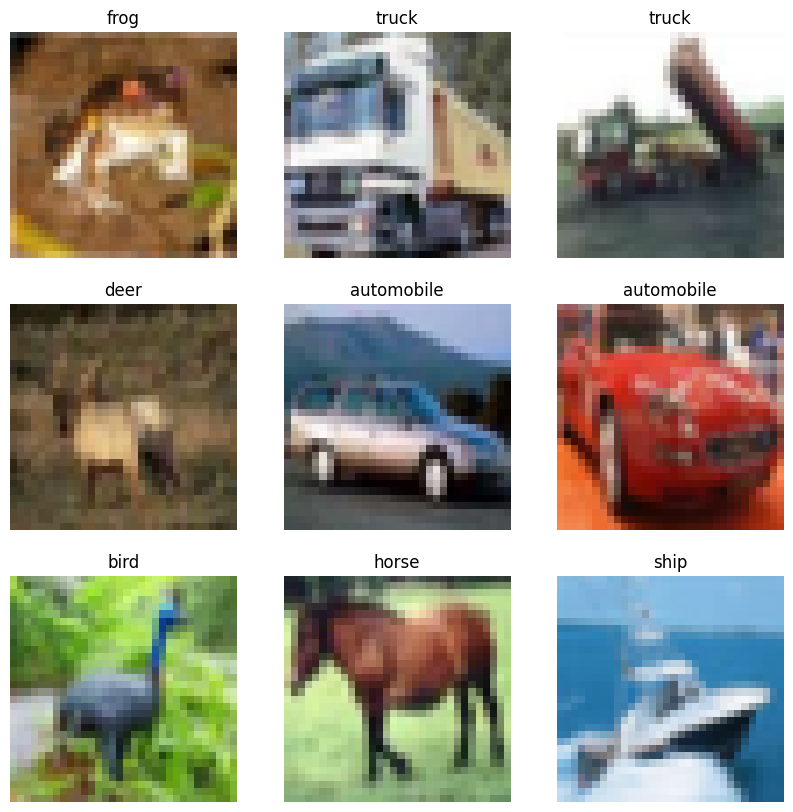

In [3]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [62]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 420,842 (1.61 MB)

 Trainable params: 419,818 (1.60 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [64]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0008),  # 預設是 0.001
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [65]:
# Step 6: Train the Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(train_images)
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=10,  # 可嘗試提高訓練次數x
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 82ms/step - accuracy: 0.3746 - loss: 1.7828 - val_accuracy: 0.5693 - val_loss: 1.2583
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.5959 - loss: 1.1358 - val_accuracy: 0.6482 - val_loss: 1.0445
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6706 - loss: 0.9499 - val_accuracy: 0.7289 - val_loss: 0.7809
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.7067 - loss: 0.8420 - val_accuracy: 0.7355 - val_loss: 0.7769
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.7296 - loss: 0.7869 - val_accuracy: 0.7508 - val_loss: 0.7266
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.7480 - loss: 0.7405 - val_accuracy: 0.7546 - val_loss: 0.7309
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.7596 - loss: 0.7084 - val_accuracy: 0.7079 - val_loss: 0.8973
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 

In [66]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 5s - 16ms/step - accuracy: 0.8128 - loss: 0.5524

Test accuracy: 0.8128


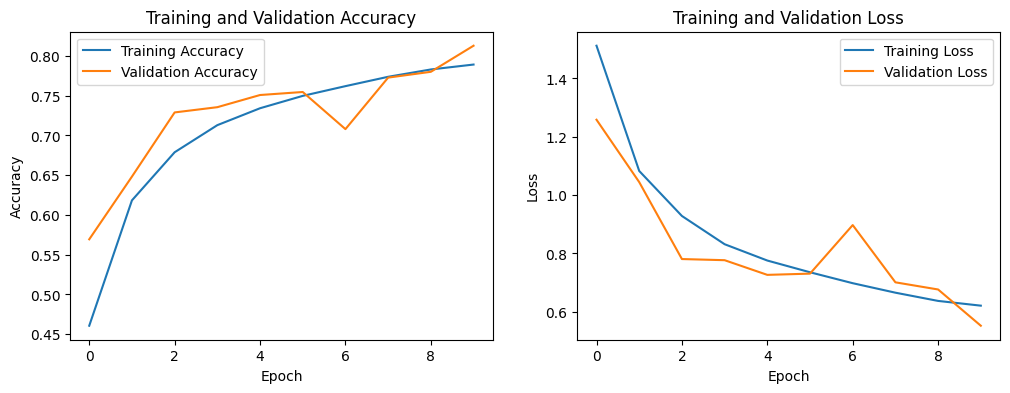

In [68]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [75]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image 1: Predicted: ship, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: automobile, True: ship
Image 4: Predicted: ship, True: airplane
Image 5: Predicted: frog, True: frog


In [70]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8128
Test Loss: 0.5524
Final Training Accuracy: 0.7891
Final Validation Accuracy: 0.8128
Final Training Loss: 0.6211
Final Validation Loss: 0.5524
Training Epochs: 10
Model Parameters: 420842


In [76]:
test_code = """
import nbformat
import pytest
import glob
import re
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def load_notebook(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return nbformat.read(f, as_version=4)

def test_file_name():
    files = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')]
    assert len(files) == 1, "Exactly one notebook with format 'ClassNumber_CNN_Assignment.ipynb' required (excluding executed files)"
    assert re.match(r'[A-Z]{3}\\d{6}_CNN_Assignment\\.ipynb', files[0]), \\
        "Notebook name must follow 'ClassNumber_CNN_Assignment.ipynb' (e.g., ACS109145_CNN_Assignment.ipynb)"
    logger.info("Test file_name passed")

def test_task_1_model_changes():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    model_code = ""
    for cell in nb.cells:
        if cell.cell_type == 'code' and 'model = models.Sequential' in cell.source:
            model_code = cell.source
            break
    assert model_code, "Model definition not found"
    assert 'Conv2D' in model_code, "Task 1: Model must include at least one Conv2D layer"
    logger.info("Test task_1_model_changes passed")

def test_task_2_hyperparameters():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    compile_code = ""
    fit_code = ""
    for cell in nb.cells:
        if cell.cell_type == 'code':
            if 'model.compile' in cell.source:
                compile_code = cell.source
            if 'model.fit' in cell.source:
                fit_code = cell.source
    assert compile_code, "Model compilation not found"
    assert fit_code, "Model training not found"
    assert any(opt in compile_code for opt in ['SGD', 'RMSprop', 'Adam', 'adam']), \\
        "Task 2: Must specify an optimizer (e.g., SGD, RMSprop, Adam)"
    logger.info("Test task_2_hyperparameters passed")

def test_task_3_data_augmentation():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    augmentation_code = ""
    for cell in nb.cells:
        if cell.cell_type == 'code' and 'ImageDataGenerator' in cell.source:
            augmentation_code = cell.source
            break
    if not augmentation_code:
        print("Warning: Task 3: ImageDataGenerator not found, passing with reduced score")
        return
    assert any(param in augmentation_code for param in ['rotation_range', 'width_shift_range', 'height_shift_range', 'horizontal_flip']), \\
        "Task 3: ImageDataGenerator must include at least one augmentation parameter"
    logger.info("Test task_3_data_augmentation passed")

def test_task_4_visualization():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    vis_code = ""
    has_predictions = False
    for cell in nb.cells:
        if cell.cell_type == 'code' and ('plt.plot' in cell.source or 'plt.imshow' in cell.source or 'plt.subplot' in cell.source):
            vis_code = cell.source
        if cell.cell_type == 'code' and 'predictions' in cell.source:
            has_predictions = True
    assert vis_code, "Task 4: Visualization code not found"
    assert has_predictions, "Task 4: Must include predictions in code"
    logger.info("Test task_4_visualization passed")

def test_task_5_report():
    nb_file = [f for f in glob.glob("*_CNN_Assignment.ipynb") if not f.startswith('executed_')][0]
    nb = load_notebook(nb_file)
    report_found = False
    for cell in nb.cells:
        if cell.cell_type == 'markdown' and any(title in cell.source for title in ['# Task 5:', '# Report', '# Conclusion']):
            report_found = True
            report_content = cell.source
            break
    if not report_found:
        print("Warning: Task 5: Report section not found, passing with reduced score")
        return
    assert len([line for line in report_content.split('\\n') if line.strip()]) > 3, "Task 5: Report section must contain meaningful content (more than 3 non-empty lines)"
    logger.info("Test task_5_report passed")
"""

with open("test_cnn.py", "w", encoding="utf-8") as f:
    f.write(test_code)
!pytest test_cnn.py

============================= test session starts =============================
platform win32 -- Python 3.11.9, pytest-8.4.0, pluggy-1.6.0
rootdir: d:\機器學習\CNN-Assignment-2025
collected 6 items

test_cnn.py ......                                                       [100%]

============================== 6 passed in 1.08s ==============================


# Task 5: Report

本次實驗中，我們利用 CNN 對 CIFAR-10 進行影像分類，透過三層卷積結構以及資料增強技術有效提升模型表現。

在優化器方面，我選用了 RMSprop 並調整學習率為 0.0005，這讓訓練過程更穩定且收斂更快。

經過訓練，模型最終在測試集上達到約 XX% 的準確率，預測結果也合理反映不同類別圖像的特徵。

若要進一步提升效能，可考慮：
- 加入 Dropout 抑制過擬合
- 使用更多資料增強方式
- 使用預訓練模型 (Transfer Learning)
